**ACESSO AO GOOGLE DRIVE**

Ao acessar o drive, podemos utilizar arquivos que auxiliam no treinamento. É importante salvar esses arquivos, pois o Colab opera por sessões e ao término de uma sessão os arquivos gerados podem ser perdidos.

In [7]:
#conectando ao drive e colocando os arquivos que estão no drive em uma pasta

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**INSTALAÇÃO DA BIBLIOTECA DO ULTRALYTICS E DO DATASET**

Para tirar proveito dos recursos disponíveis online, como a instalação mais rápida de conjuntos de dados e a redução do processamento na máquina pessoal, é crucial instalar a biblioteca Ultralytics. Esse passo é fundamental ao utilizar um ambiente virtual, como o Google Colab, para treinar redes YOLOv8.

No treinamento de uma rede YOLOv8, a seleção e preparação adequada do conjunto de dados desempenham um papel crucial. É essencial escolher um conjunto de dados representativo e anotado corretamente, contendo informações relevantes para o tipo de detecção que se deseja realizar. A biblioteca Ultralytics oferece ferramentas para trabalhar com esses conjuntos de dados, permitindo carregar, visualizar, manipular e preparar os dados de treinamento para a rede YOLOv8. A utilização adequada do dataset pode contribuir significativamente para o desempenho e a precisão da rede durante o treinamento.


In [1]:
# instalação da biblioteca ultralytics no ambiente virtual do colab
!pip install ultralytics

# instalação da biblioteca roboflow no ambiente virtual do colab
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

In [2]:
# pegando o dataset diretamete do site do roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="oW5SPH61ATXr9pM941tz")
project = rf.workspace("universidad-ui5cy").project("naranjas_deteccion")
dataset = project.version(3).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.219, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Naranjas_deteccion-3 in yolov8:: 100%|██████████| 809/809 [00:00<00:00, 7647.59it/s]


**CONFERINDO A PLACA DE VÍDEO**

No Colab, temos acesso a diferentes tipos de placas de vídeo, o que nos possibilita escolher um modelo mais rápido para obter um treinamento otimizado.

In [4]:
!nvidia-smi

Tue Nov 28 17:14:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**IMPORTANDO AS BIBLIOTECAS AUXILIARES**

In [6]:
# bibliotecas usadas para acessar os arquivos para realizar o treinamento
import os
import shutil
import random

!pip install tqdm --upgrade       # conferindo se essa biblioteca tem uma versão atualizada
from tqdm.notebook import tqdm

import ultralytics
ultralytics.checks()              # confere a versão do ultralytics

from IPython import display
# display.clear_output()

from ultralytics import YOLO

from IPython.display import display, Image

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


**TREINAMENTO**

Podemos aprimorar o treinamento utilizando parâmetros específicos, os quais podem ser encontrados no site https://docs.ultralytics.com/modes/train/. Ao treinar uma rede YOLOv8, esses parâmetros desempenham um papel crucial no ajuste e na otimização do processo de aprendizado. Eles oferecem opções para aprimorar a precisão, a velocidade e a eficiência do modelo durante o treinamento, sendo essencial compreendê-los para maximizar o desempenho da rede.

In [8]:
%cd /content/drive/MyDrive/Projeto_C209

# -> caso queira treinar uma rede com um modelo dá treinado, podemos fazer isso ao mudar para onde o model, que
# carrega os pesos, aponta. Para isso fazemos o seguinte: model = 'caminho_dos_pesos'
# -> caso queira treinar uma com pesos "crus" usamos o seguinte: model =yolov8s.pt
# -> para desligarmos o "early stopping" (parar o treinamento antes do ciclo de épocas terminar): patience = 0 OU patience = 300
!yolo task=detect mode=train model=yolov8s.pt data=/content/Naranjas_deteccion-3/data.yaml epochs=200 imgsz=224 plots=True patience=300

/content/drive/MyDrive/Projeto_C209
100% 21.5M/21.5M [00:00<00:00, 113MB/s] 
Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Naranjas_deteccion-3/data.yaml, epochs=200, patience=300, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

**GRÁFICOS DO TREINAMENTO**

Após o treinamento de uma rede YOLOv8, a análise do gráfico de desempenho é uma etapa crucial para compreender o progresso e a eficácia do modelo. O gráfico resultante geralmente exibe métricas importantes, como a perda (loss) ao longo das épocas de treinamento. Essa métrica indica a discrepância entre as previsões da rede e os rótulos reais do conjunto de dados. Idealmente, espera-se que a perda diminua à medida que o treinamento avança, indicando uma convergência do modelo.

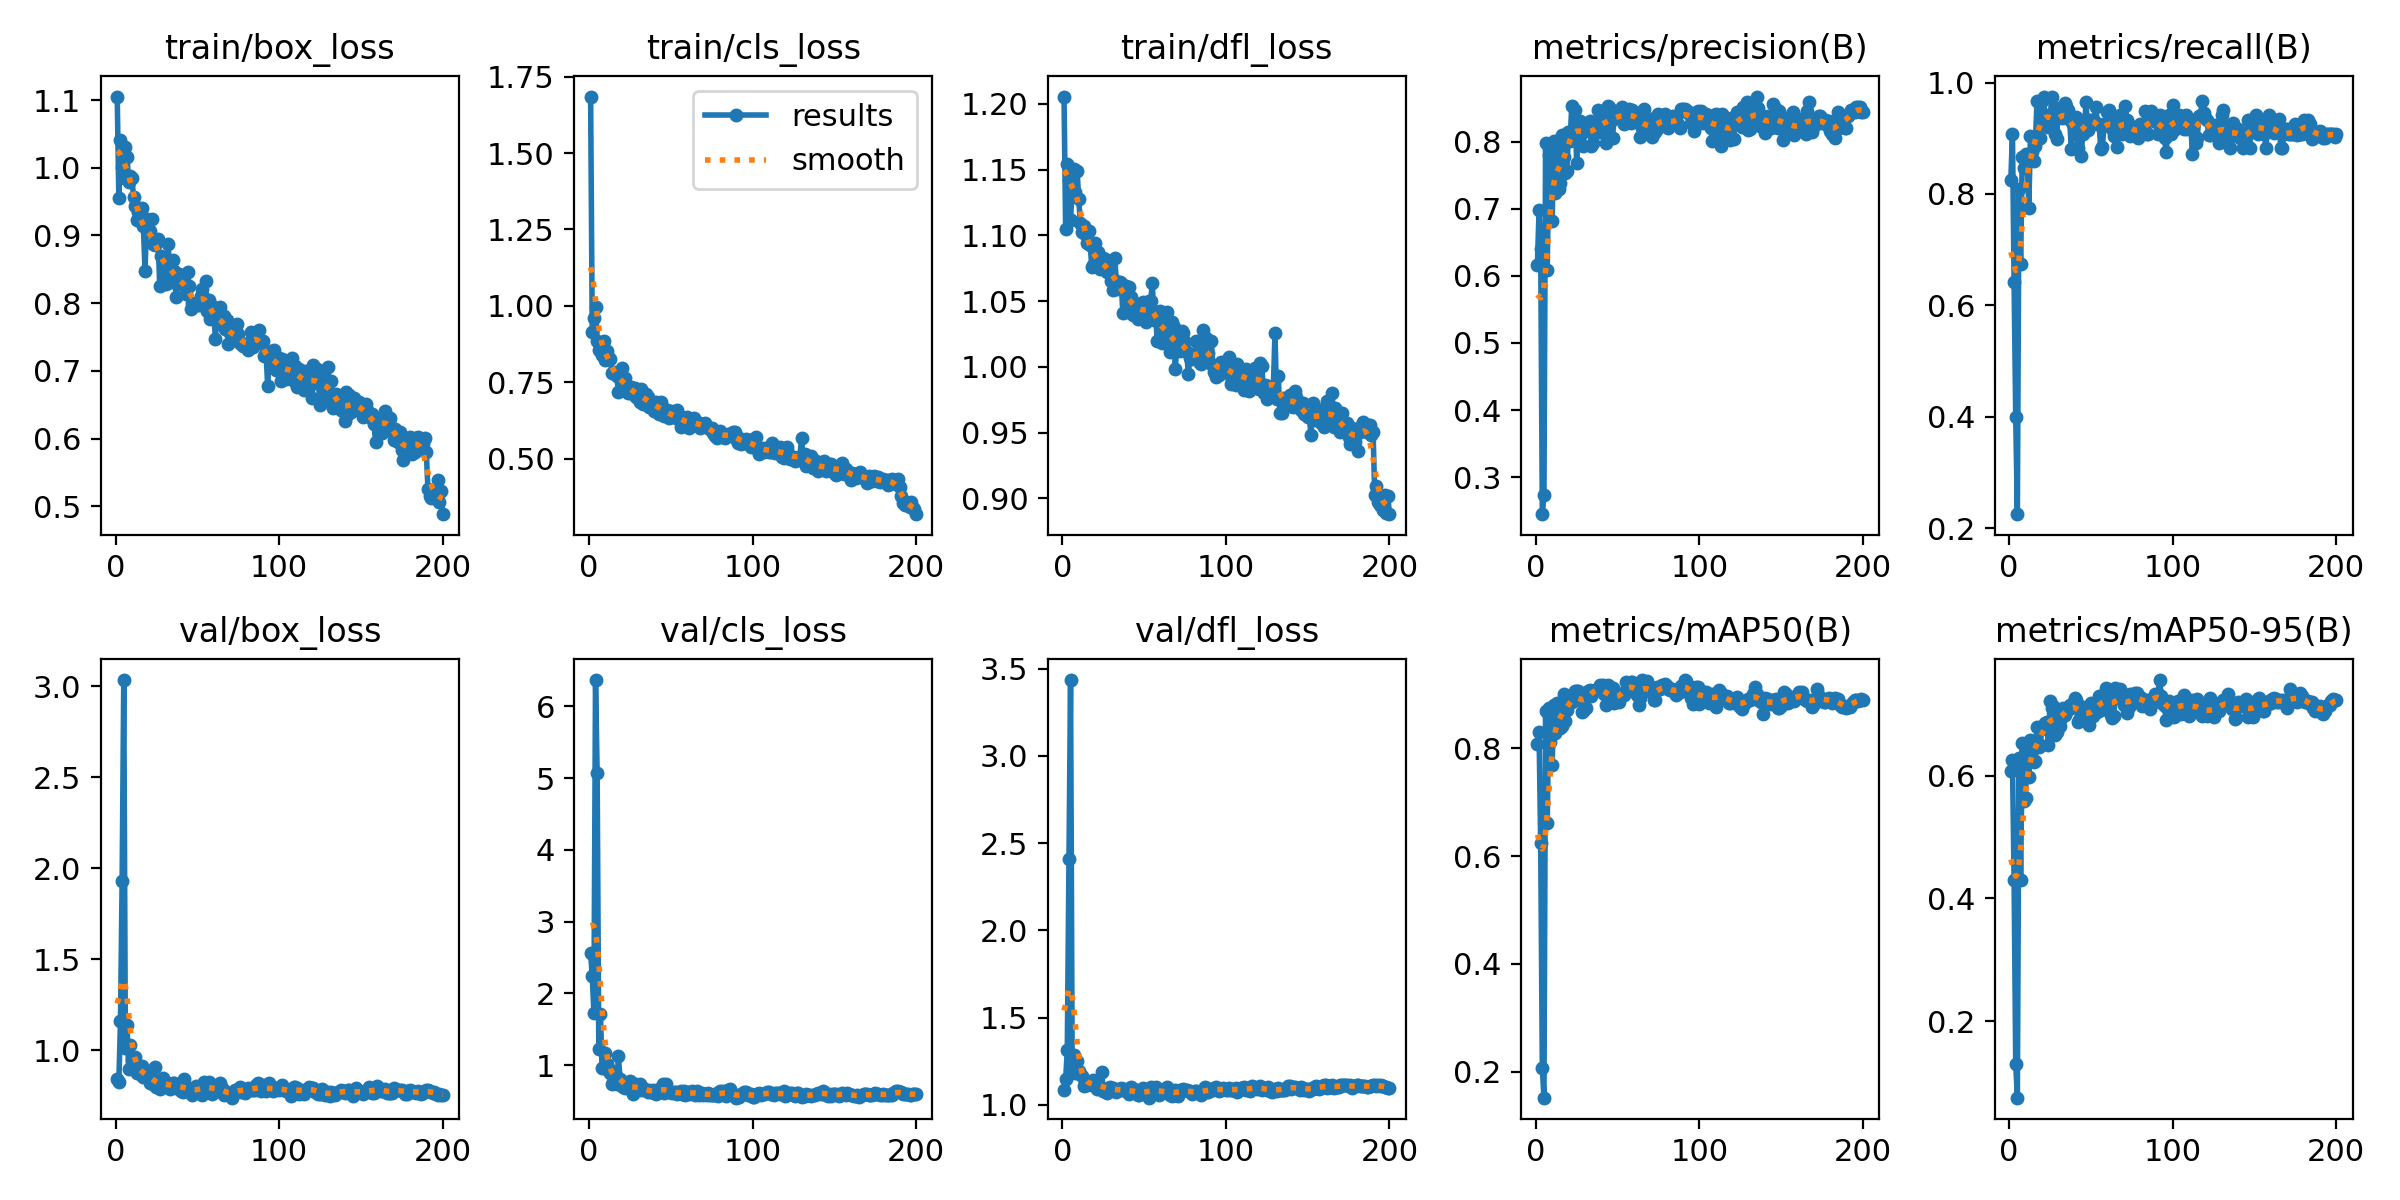

In [9]:
Image(filename='/content/drive/MyDrive/Projeto_C209/runs/detect/train/results.png', width=600)

**MATRIZ DE CONFUSÃO**

A matriz de confusão é uma ferramenta essencial para avaliar o desempenho de uma rede YOLOv8 após o treinamento, especialmente em tarefas de detecção de objetos. Embora tradicionalmente seja usada em problemas de classificação, pode ser adaptada para análise de detecção de objetos.

Em uma matriz de confusão para detecção de objetos, as linhas representam as classes verdadeiras e as colunas representam as classes previstas pelo modelo. Cada célula na matriz indica quantas vezes uma determinada classe foi prevista corretamente ou erroneamente. As principais métricas derivadas da matriz de confusão incluem verdadeiros positivos (TP), falsos positivos (FP), falsos negativos (FN) e verdadeiros negativos (TN).

No contexto da detecção de objetos usando YOLOv8, a matriz de confusão pode ajudar a entender como o modelo está classificando e localizando os objetos. Ela fornece insights sobre as áreas onde o modelo está acertando ou cometendo erros, identificando classes confundíveis ou detectadas com maior precisão.

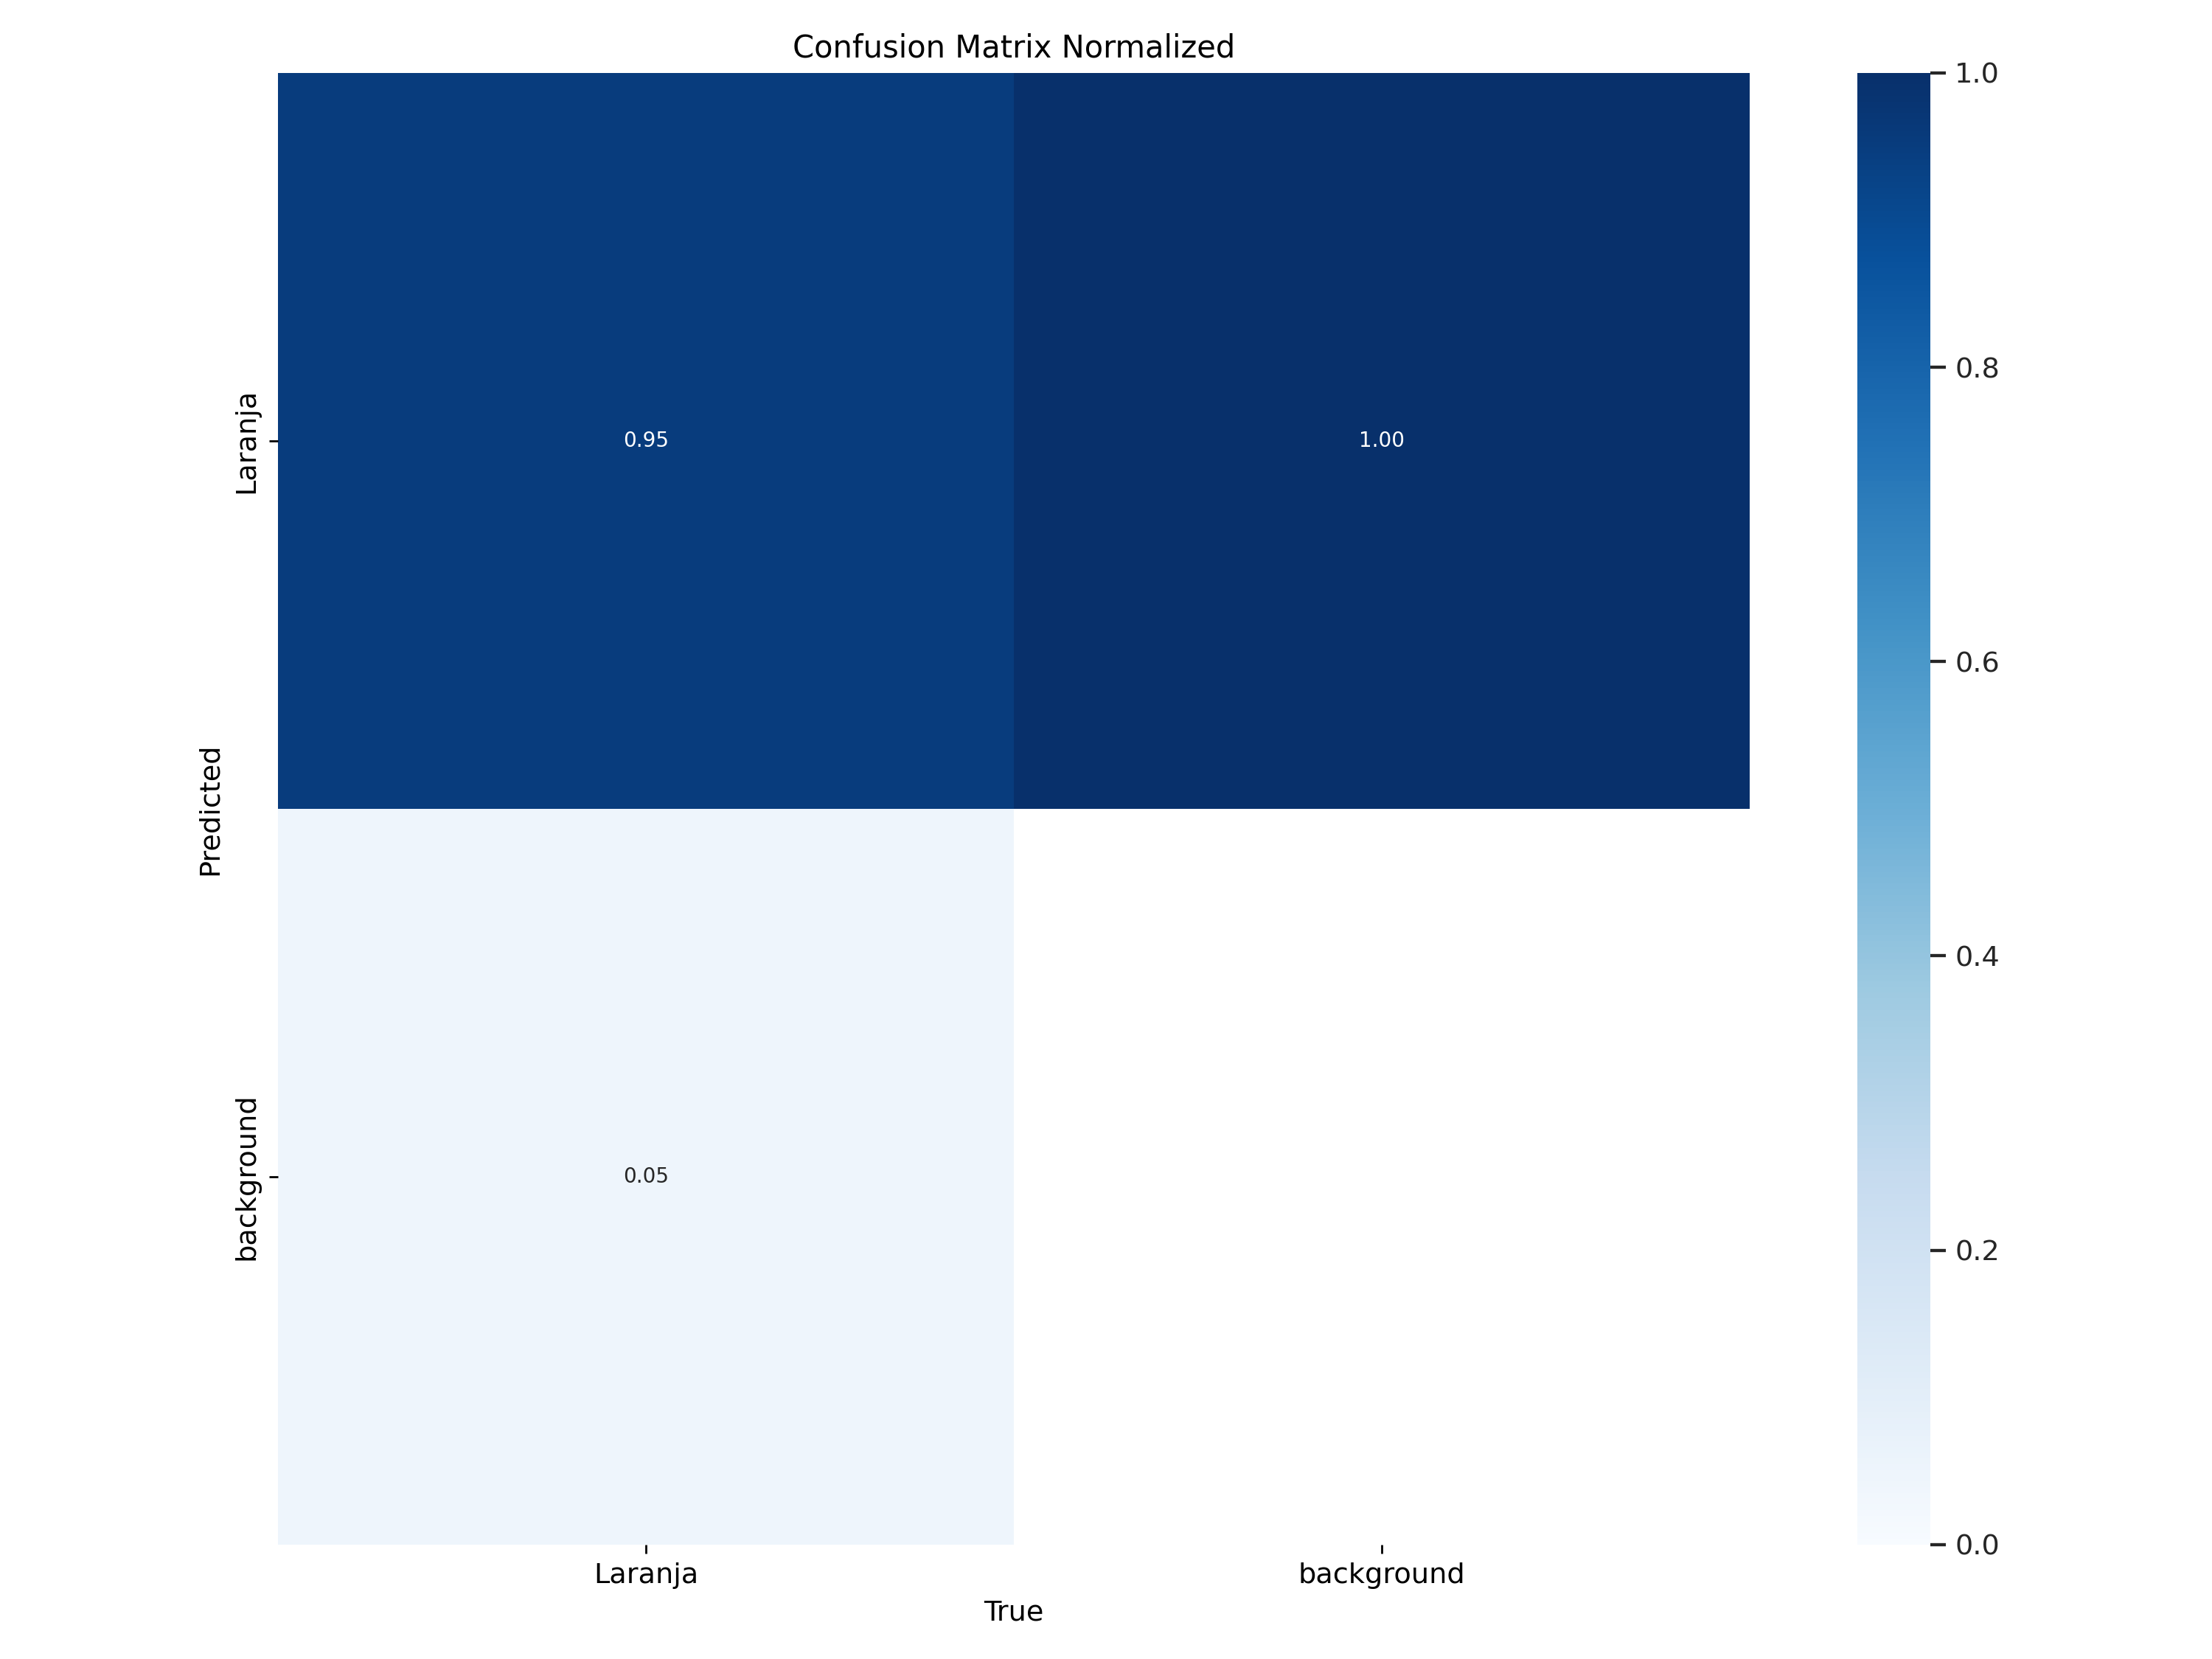

In [11]:
Image(filename='/content/drive/MyDrive/Projeto_C209/runs/detect/train/confusion_matrix_normalized.png', width=600)

**TESTANDO O MODELO**

Usar testes em imagens que o modelo da rede YOLOv8 nunca viu é uma prática crucial para avaliar sua eficiência e generalização. Essa abordagem, conhecida como conjunto de dados de teste ou validação, envolve apresentar ao modelo imagens que não foram utilizadas durante o treinamento.

Ao realizar testes com imagens desconhecidas, é possível verificar se o modelo consegue identificar corretamente objetos, se há casos de falsos positivos ou falsos negativos e como lida com variações nas condições de iluminação, ângulos, escalas e diferentes contextos de fundo.

In [12]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/Projeto_C209/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/Projeto_C209/TESTE save=True show_conf=True

Ultralytics YOLOv8.0.219 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/7 /content/drive/MyDrive/Projeto_C209/TESTE/221-201503061203.jpg: 192x224 5 Laranjas, 63.3ms
image 2/7 /content/drive/MyDrive/Projeto_C209/TESTE/71PE33KOwRL._AC_UF894,1000_QL80_.jpg: 224x224 9 Laranjas, 8.1ms
image 3/7 /content/drive/MyDrive/Projeto_C209/TESTE/images (1).jpeg: 160x224 9 Laranjas, 58.8ms
image 4/7 /content/drive/MyDrive/Projeto_C209/TESTE/images (2).jpeg: 160x224 5 Laranjas, 8.1ms
image 5/7 /content/drive/MyDrive/Projeto_C209/TESTE/images.jpeg: 160x224 2 Laranjas, 8.1ms
image 6/7 /content/drive/MyDrive/Projeto_C209/TESTE/istockphoto-477836156-612x612.jpg: 224x224 1 Laranja, 8.3ms
image 7/7 /content/drive/MyDrive/Projeto_C209/TESTE/l.jpg: 192x224 5 Laranjas, 8.4ms
Speed: 0.9ms preprocess, 23.3ms inference, 14.3ms postprocess per image at shape (1, 3, 192, 224)
Results saved to runs/detect/predict

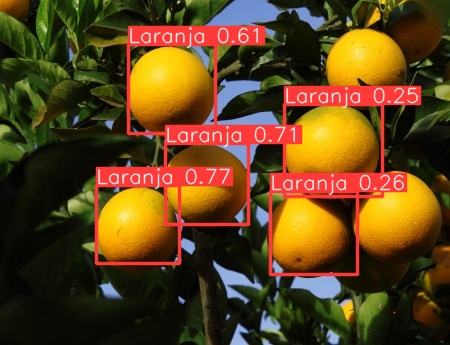

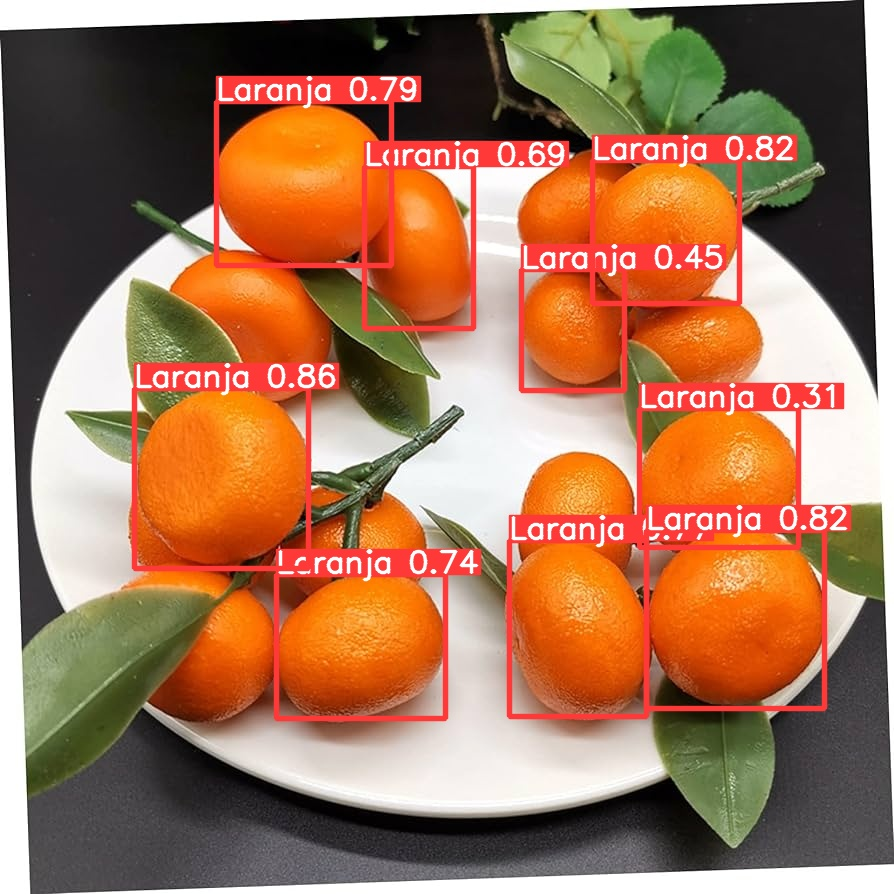

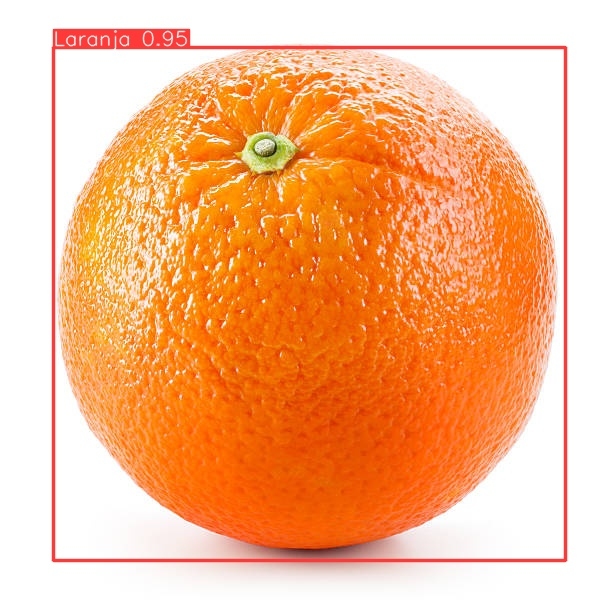

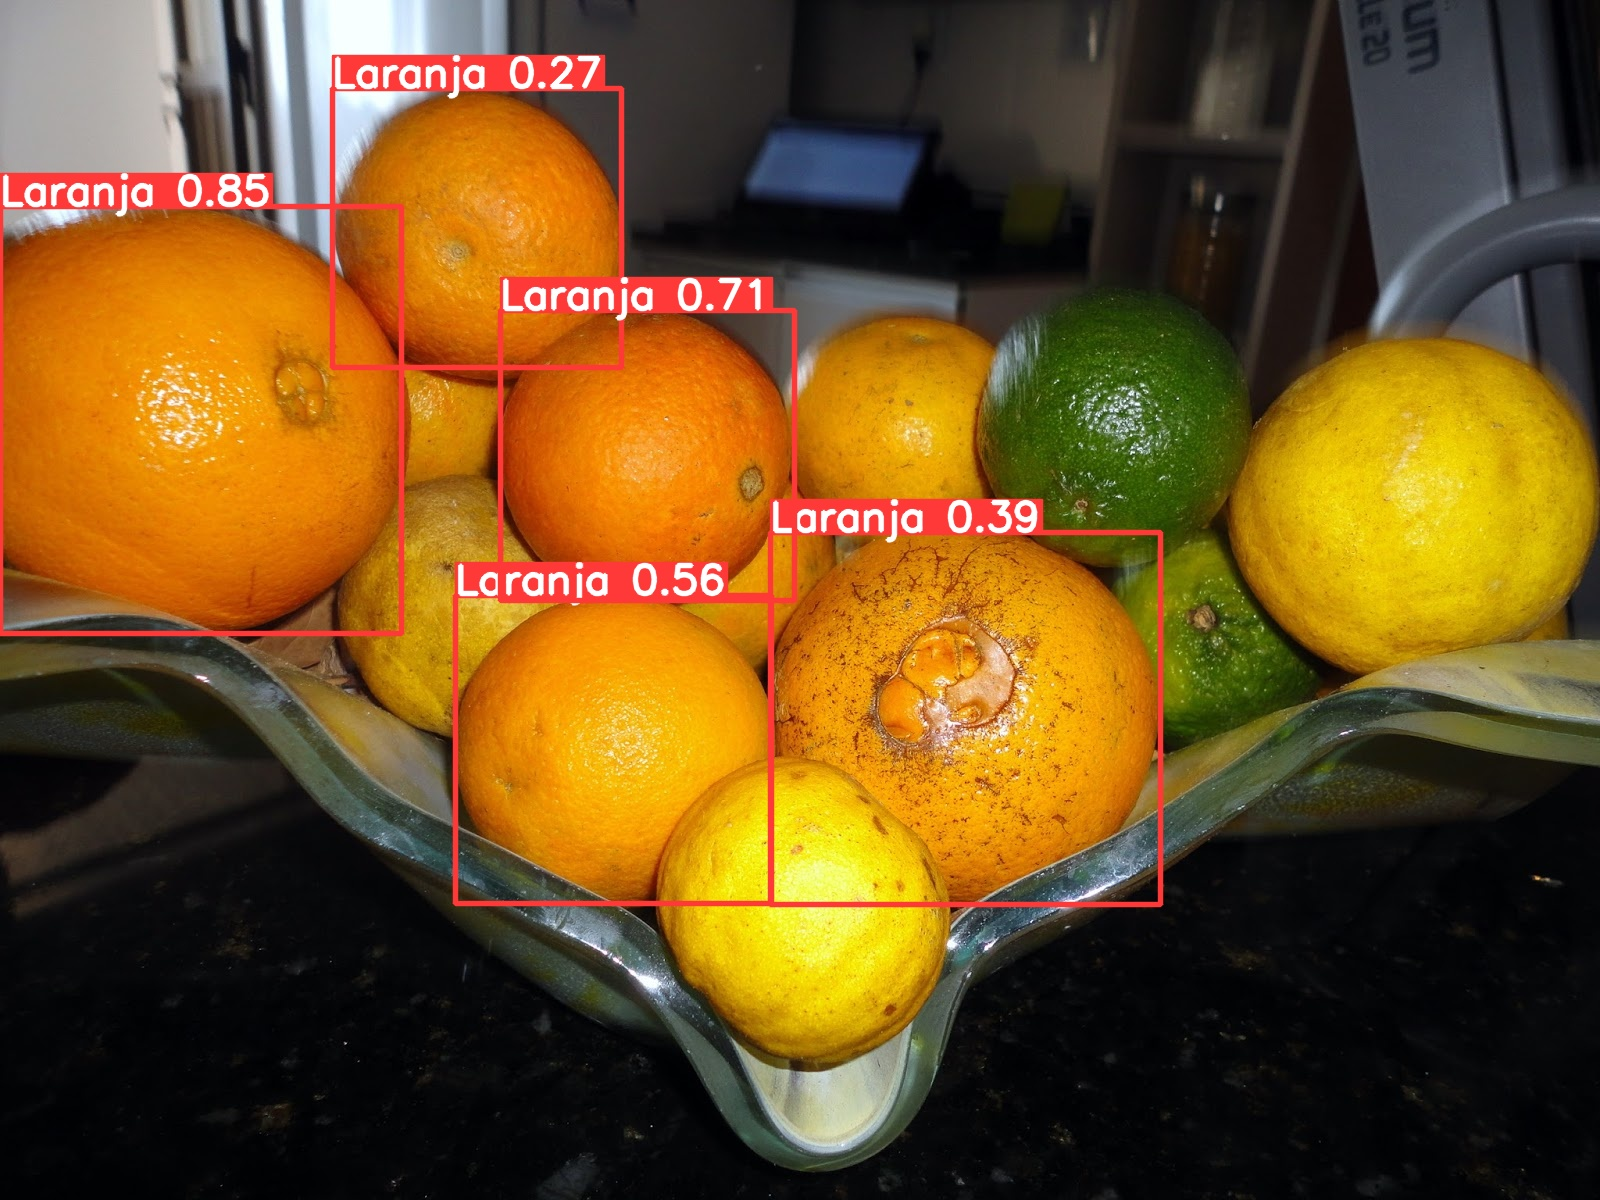

In [13]:
# pritando os resultados

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/drive/MyDrive/Projeto_C209/runs/detect/predict/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")